**Important: for Activity 3 and Activity 4 , please use the file Data_Marketing_Customer_Analysis_Round3.csv from the Data folder.**


## Activity 3 (Wednesday)
As a reminder the objective of this study is to predict the **total claim amount** of a customer and study/investigate the impact of the factors (input features) on the target variable (total claim amount). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.

-  Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
-- Use seaborn library to construct distribution plots for the numerical variables
-- Use Matplotlib to construct histograms.
-- Do the distributions for different numerical variables look like a normal distribution?
- For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.
- Plot the Correlation Heatmap.
---
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

In [3]:
dmca_df = pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round3.csv")
dmca_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


- ### Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [4]:
numerical_df = dmca_df.select_dtypes(include=np.number)

categorical_df = dmca_df.select_dtypes(include="object")


In [33]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [34]:
categorical_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


- ### Use seaborn library to construct distribution plots for the numerical variables

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

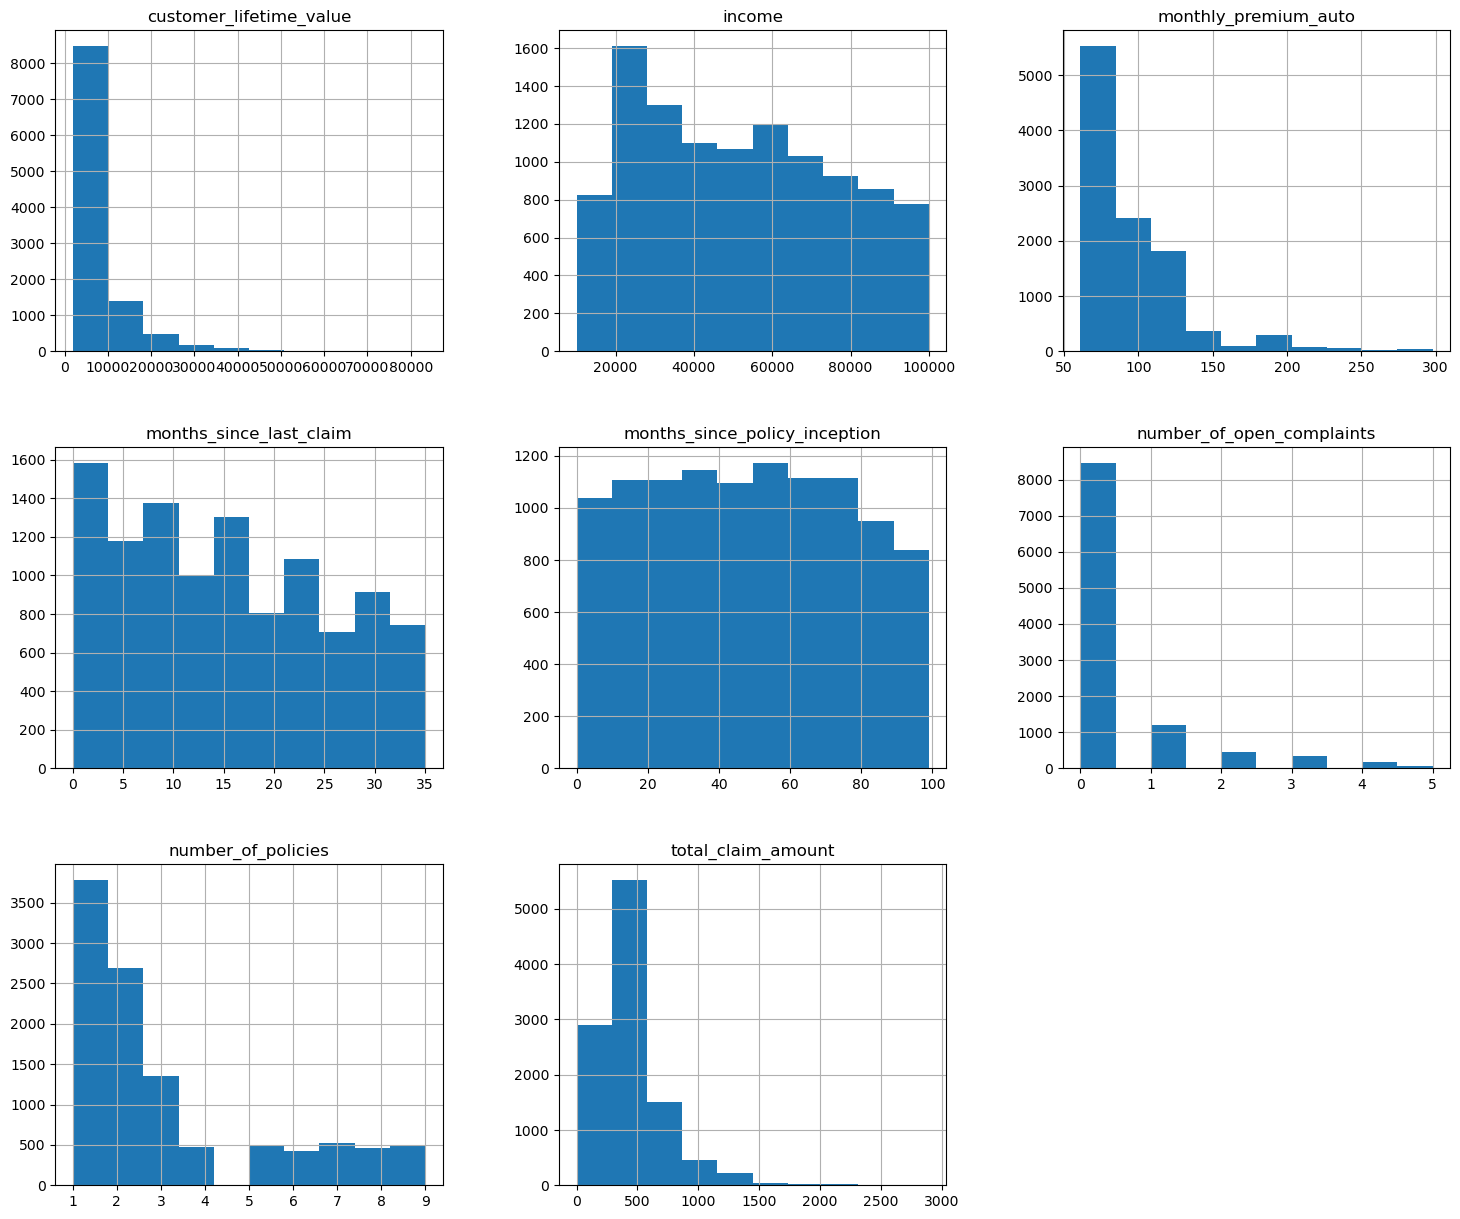

In [45]:
numerical_df.hist(figsize=(18,15))

- ### Use Matplotlib to construct histograms.

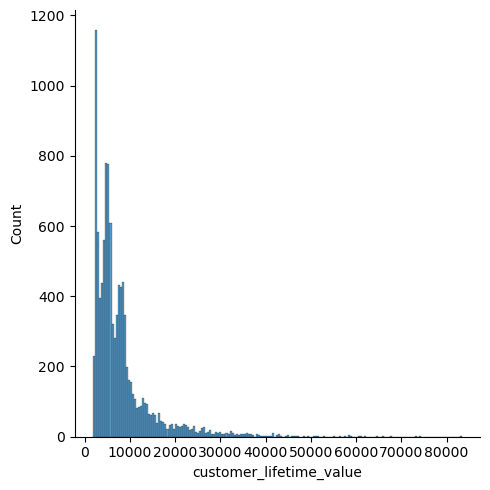

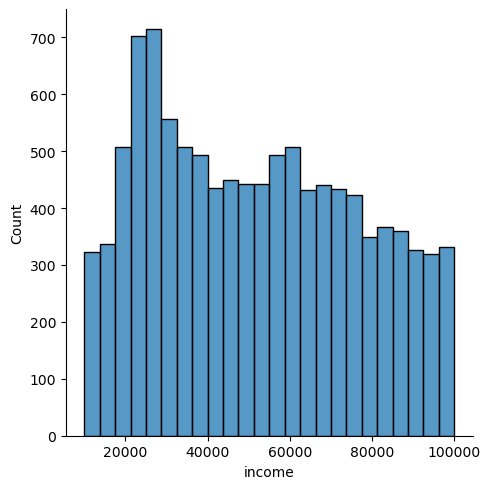

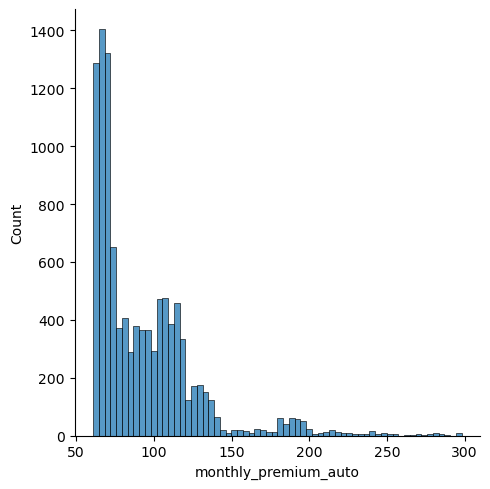

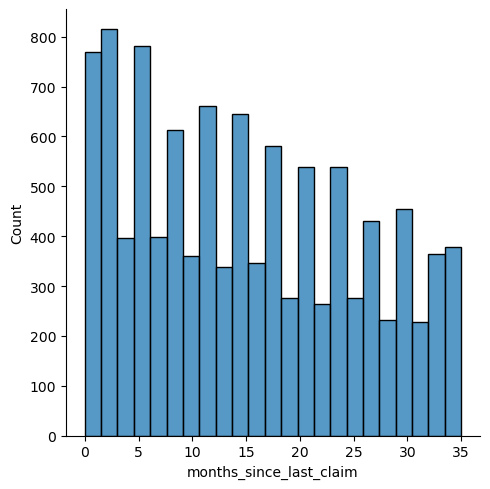

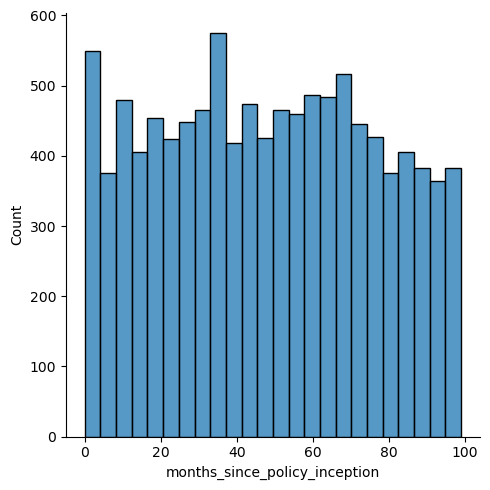

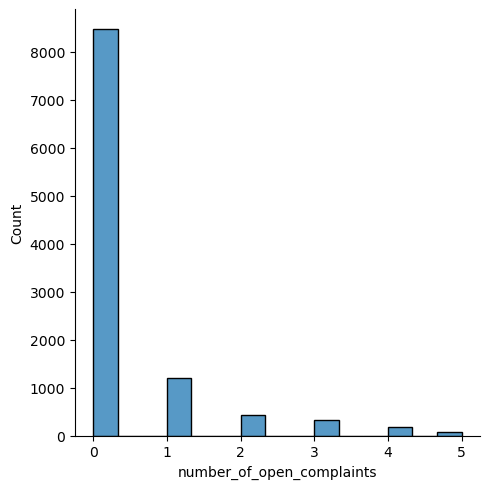

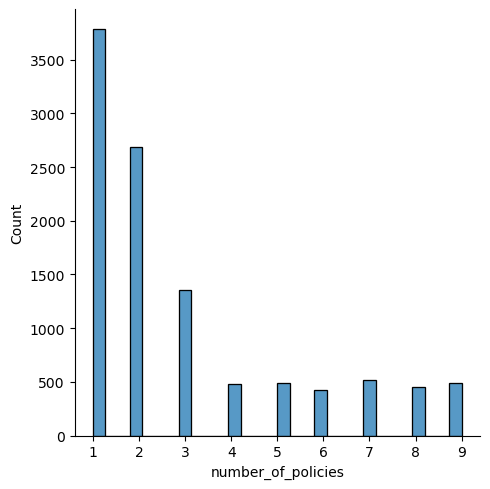

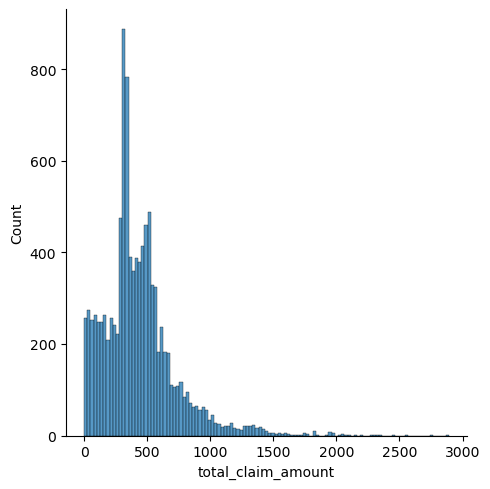

In [40]:
sns.displot(numerical_df.customer_lifetime_value)
sns.displot(dmca_df.income)
sns.displot(dmca_df.monthly_premium_auto)
sns.displot(dmca_df.months_since_last_claim)
sns.displot(dmca_df.months_since_policy_inception)
sns.displot(dmca_df.number_of_open_complaints)
sns.displot(dmca_df.number_of_policies)
sns.displot(dmca_df.total_claim_amount)

- ### Do the distributions for different numerical variables look like a normal distribution?

In [7]:
# No one of the numerical variables distributions seem to fit a normal distribution

- ### For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.

In [8]:
correlation = numerical_df.corr()
correlation

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


<AxesSubplot:>

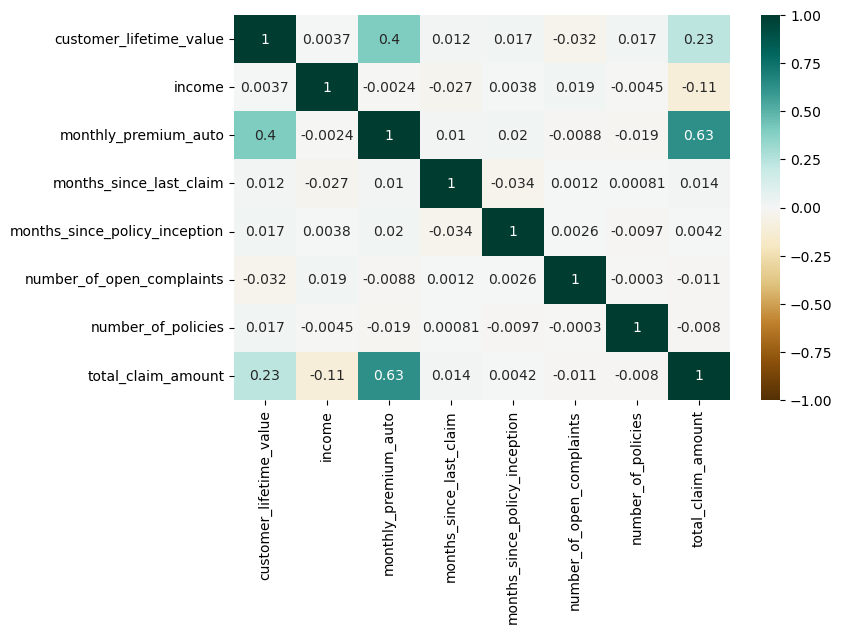

In [44]:
fig = plt.figure(figsize = (8,5))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')

- ### (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [10]:
# There arn't any features the show a correlation higher than 0.9

## Activity 4 (Thursday)
- Show a plot of the total number of responses.
- Show a plot of the response by the sales channel.
- Show a plot of the response by the total claim amount.
- Show a plot of the response by income.
- (Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.
- Clean your notebook and make it readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

- ### Show a plot of the total number of responses.

no     9316
yes    1373
Name: response, dtype: int64


Text(0, 0.5, 'Responses')

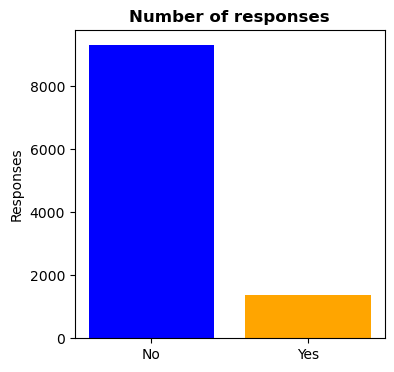

In [63]:
fig = plt.figure(figsize=(4,4))
#count of how many responses the company received
response_count = dmca_df['response'].value_counts()
print(response_count)

#settings of the plot
plt.bar(response_count.index, response_count, color=('blue','orange'))
plt.title('Number of responses', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["No","Yes"])
plt.ylabel("Responses")

- ### Show a plot of the response by the sales channel.

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

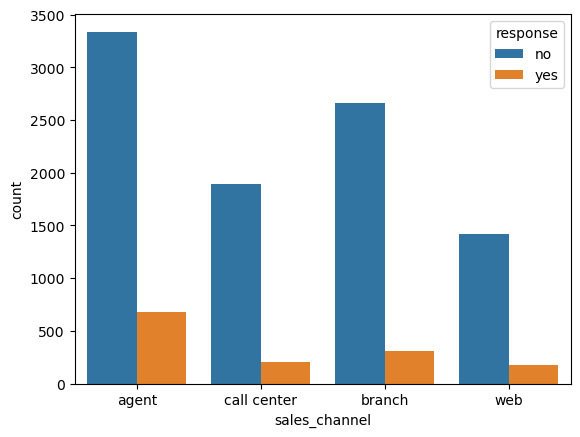

In [12]:
sns.countplot(x ='sales_channel', hue = "response", data = dmca_df)


- ### Show a plot of the response by the total claim amount.

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

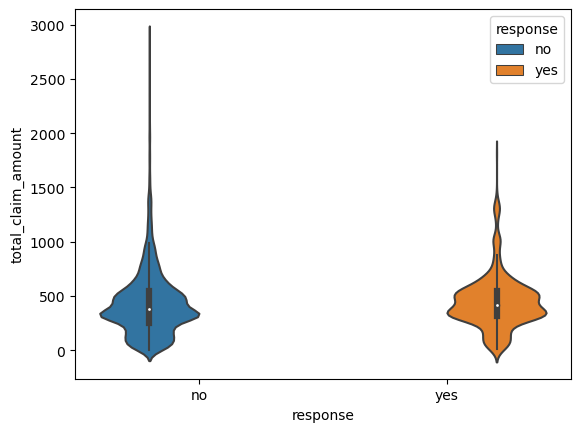

In [47]:
sns.violinplot(data=dmca_df, y='total_claim_amount', x="response", hue="response")


- ### Show a plot of the response by income.

<AxesSubplot:xlabel='response', ylabel='income'>

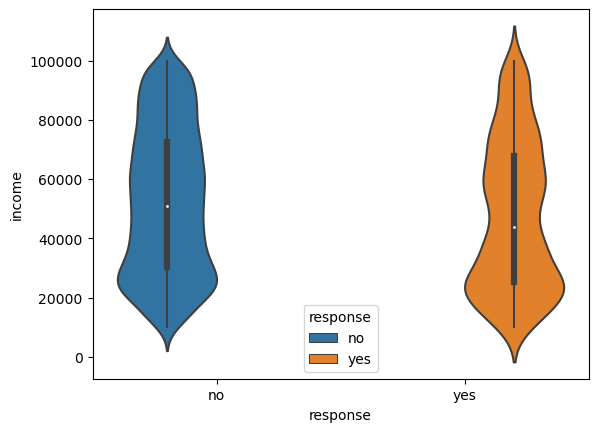

In [52]:
sns.violinplot(y='income', x="response", hue="response", data = dmca_df)

- ### (Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.

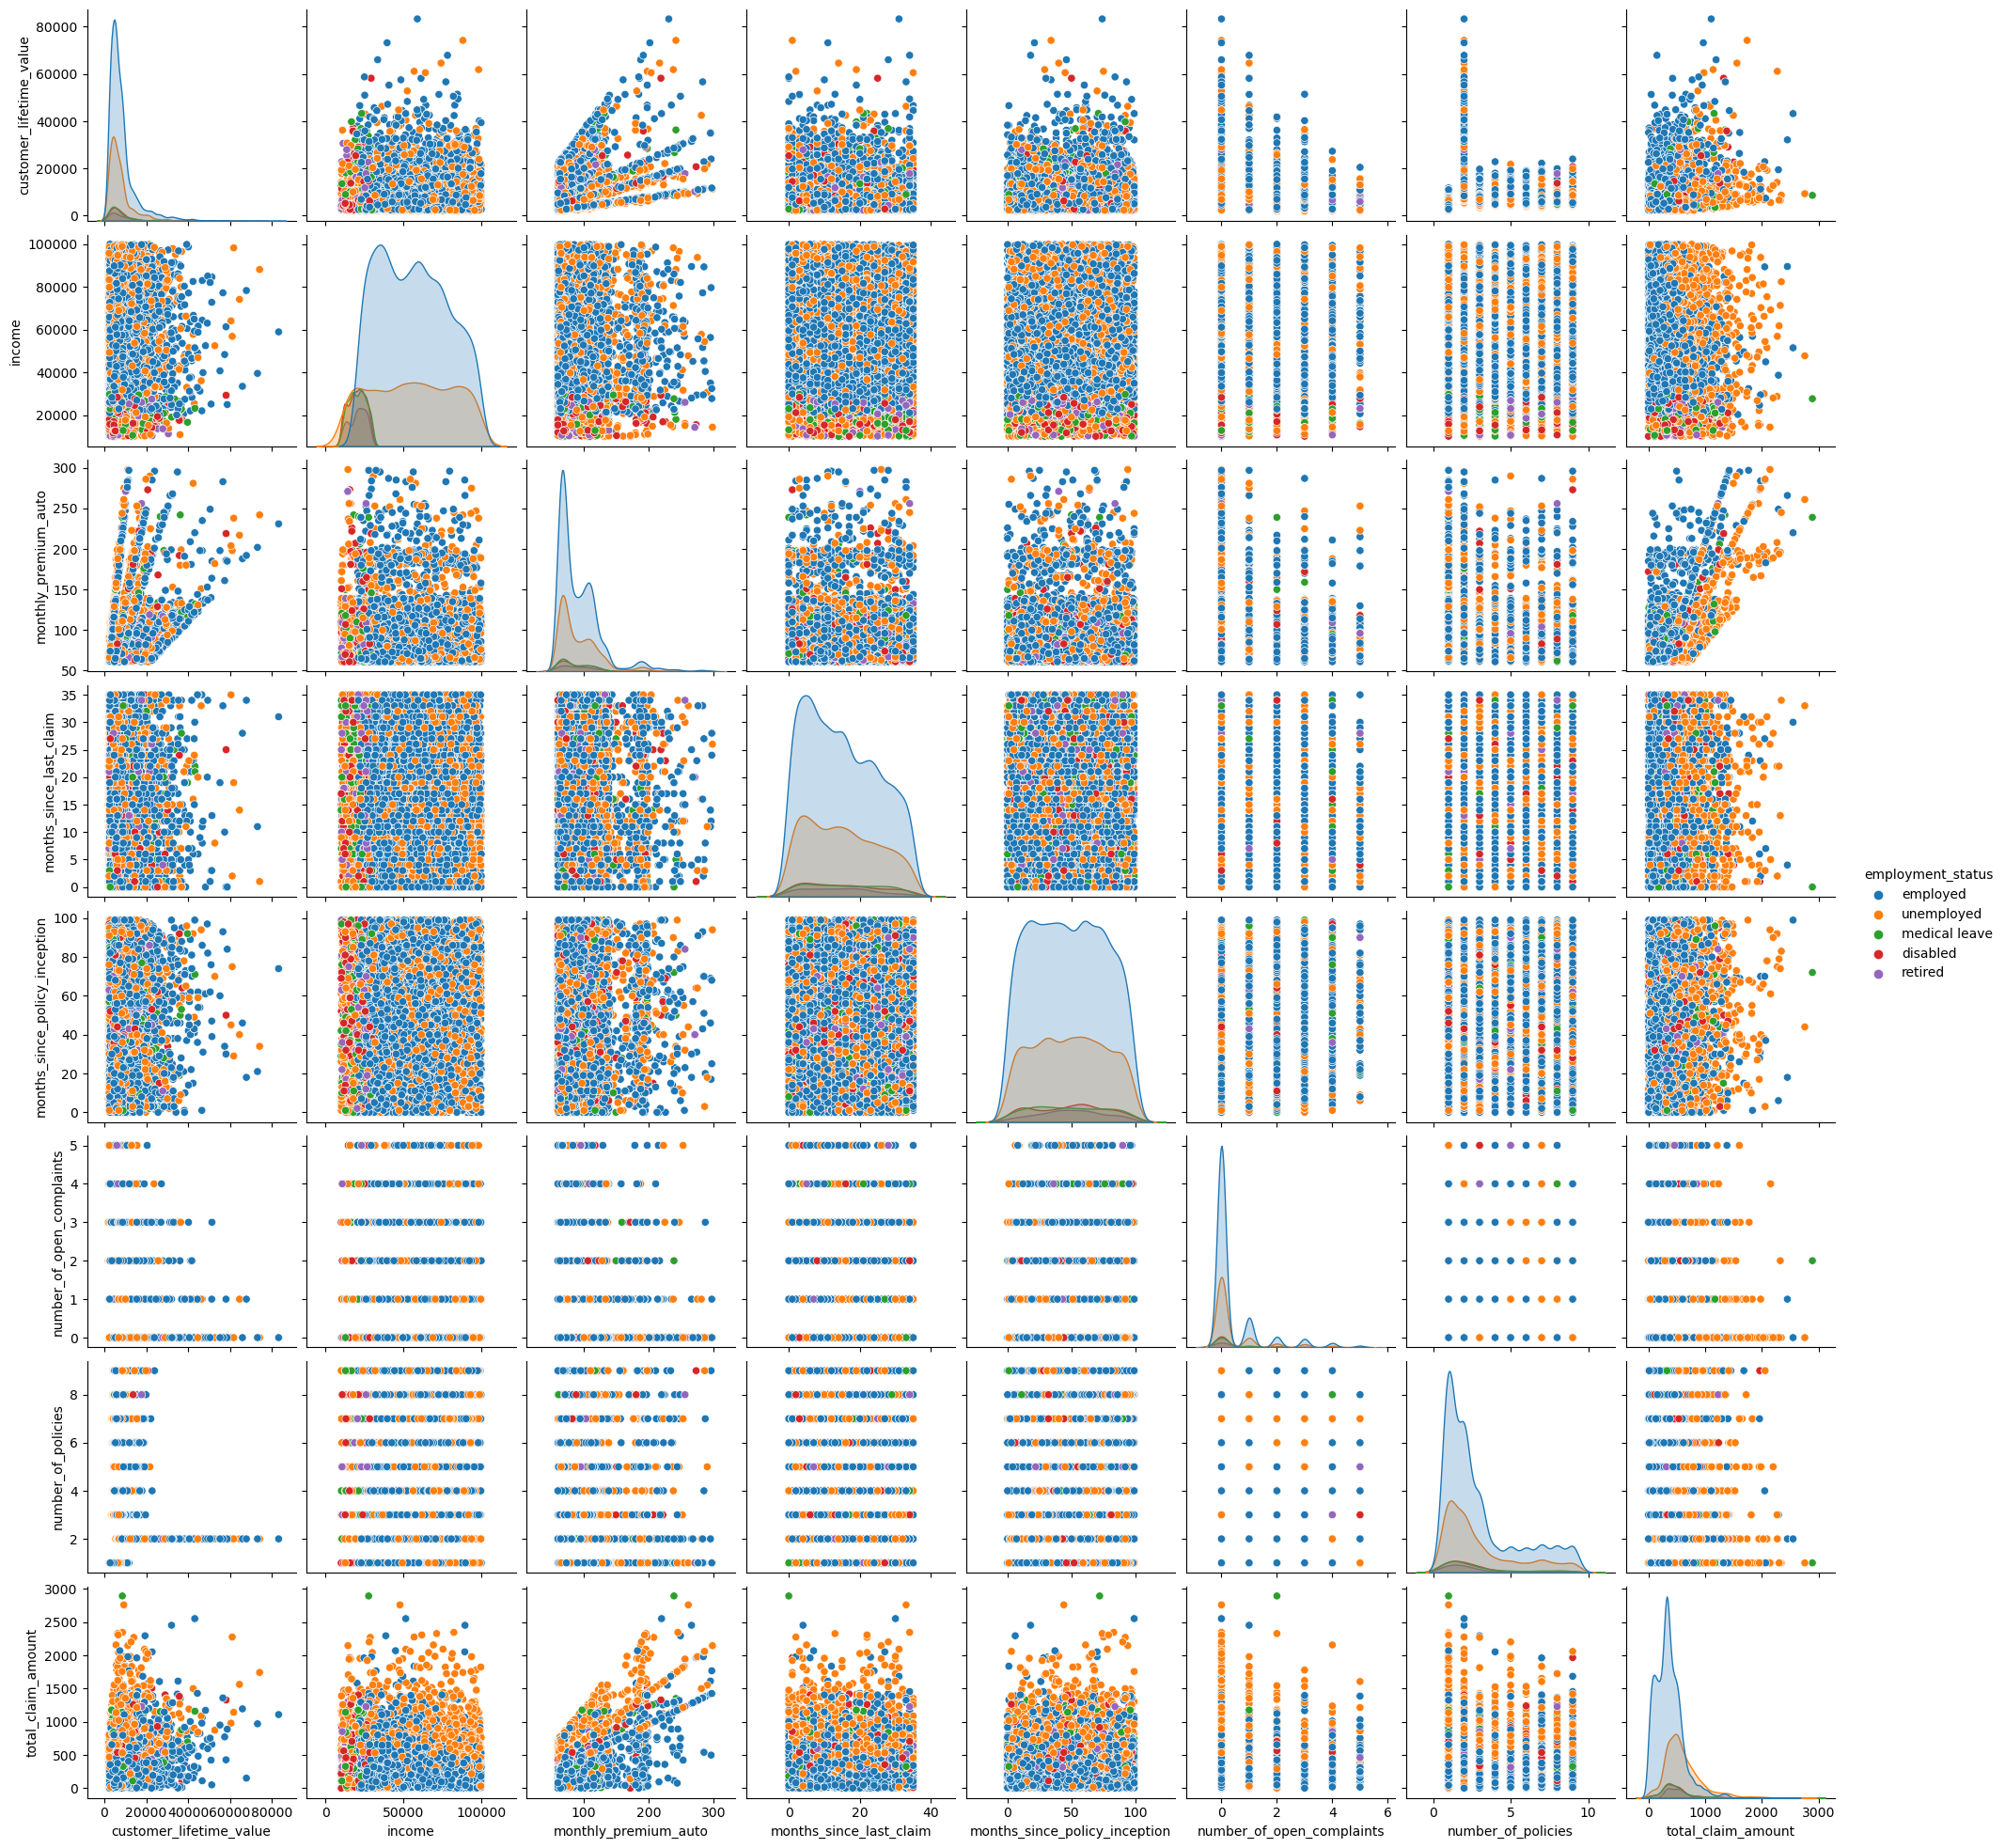

In [59]:
sns.pairplot(dmca_df, hue="employment_status") #plotting equivalent to the heatmap but sorted by employment status

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

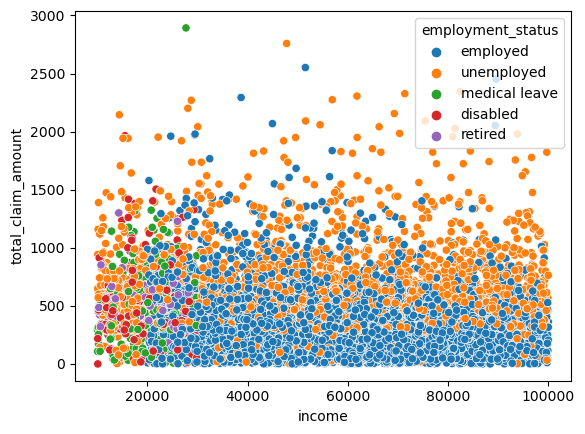

In [57]:
sns.scatterplot(data=dmca_df, x="income", y="total_claim_amount", hue="employment_status")